# Idiomatic Expression and Array Oriented Solutions in APL

## Goals for code
- Arriving at working solution ASAP
- Expressing the solution is the clearest way possible
- Finding the most performant solution (CPU time, memory)

Busy people need to arrive at solutions.

However, it can worth exploring AOP solutions to get a better understanding of the problem or to learn new techniques or ways of writing code.

## Idiomatic APL
- How people tend to use APL
- Driven by both language and device limitations
- Definitely has changed, especially since nested arrays
- Non-trivial but often used functions become part of the idiom library ([APLCart](https://aplcart.info))
- Dyalog's unfortunate use of the word **idiom**: [Dyalog idioms](https://docs.dyalog.com/latest/CheatSheet%20-%20Idioms.pdf)

## Array-oriented algorithms
- In Dyalog APL, focus on data transformations and applying the smallest possible functions (close to primitives) to the largest possible collections of data (large arrays).

> "It is better to have 100 functions operate on one data structure than to have 10 functions operate on 10 data structures." This quote is from Alan Perlis' Epigrams on Programming (1982).

- The **each** operator `F¨` and rank operator `F⍤j k` are both loops conceptually.
- Flat array solutions tend to be faster, but can be messier.
- Select from arrays based on conditions
- Use mathematical insights to vectorise algorithms

## In this workshop
- Learn some techniques
- Dissect some flat-array APL
- Practise problem solving

### Example: Salaries

Given 12 salaries of employees in 4 groups:

In [1]:
s ← {⎕RL←42 ⋄ 20000+5000×?⍵⍴3}12
g ← {⎕RL←42 ⋄ ⎕A[?12⍴⍵]}4
⎕←↑g s

C C A A C C B B C C D A
35000 35000 25000 25000 35000 35000 30000 30000 35000 35000 25000 35000

For each salary, if the person is in group **B**, increase by $10\%$. If the person is in group **D**, increase by $5\%$. Otherwise, salary remains the same.

In [2]:
s×1+(0.05×'D'=g)+(0.1×'B'=g)

35000 35000 25000 25000 35000 35000 33000 33000 35000 35000 26250 35000

In [3]:
'BD' (10 5) Increase g s

VALUE ERROR: Undefined name: Increase
      'BD'(10 5)Increase g s
                ∧


### Example: Arrival times
A workshop begins at 10:00. Arriving 

- If a person arrived before the start time, return `'early'`.
- If a person arrived within 10 minutes (exclusive) of the start time, return `'on time'`.
- If a person arrived 10 miutes after the start time *or later*, return `'late'`.

In [4]:
start ← 600 610             ⍝ Start time window in minutes since midnight
arrive ← 590+10,20,?10⍴30   ⍝ Arrival time of 12 participants
⎕←arrive

600 610 603 606 592 616 605 608 619 608 613 608

In [5]:
↑(arrive)('early' 'on time' 'late'[1++⌿start∘.≤arrive])

600 610 603 606 592 616 605 608 619 608 613 608 
 on time late on time on time early late on time on time late on time late on time

In [6]:
('early' 'on time' 'late'[1+start⍸arrive])

on time late on time on time early late on time on time late on time late on time

### Problem: Who Attended?
This problem comes from [phase 2 of the 2022 APL Problem Solving Competition](https://www.dyalog.com/uploads/files/student_competition/2022_problems_phase2.pdf#page=14).

Each year, Dyalog Ltd sponsors a user meeting where Dyalog staff and users have an
opportunity to present topics of interest and interact with one another. Due to the impact
of COVID-19, the meetings for 2020 and 2021 were conducted virtually using Zoom.
People registered ahead of time and could then sign-on and attend, virtually, any or all
sessions. There were two partial days of sessions in each year.

After the conclusion of the user meeting, Zoom sent Dyalog Ltd a CSV file containing
information including when each attendee joined or left the meeting. The tasks in this
problem involve analyzing this information. There are two files that you will need for this
problem:

AttendeesSA1.csv consists of 5 columns:
- **Attendee** - *character vector* - made up randomly generated names.
- **Join Time** - *character vector* - date and time attendee joined the meeting
- **Leave Time** - *character vector* - date and time attendee left the meeting
- **Join Time Number** - *integer* - 1-second precision time number
- **Leave Time Number** - *integer* - 1-second precision time number

ScheduleSA1.csv consists of 6 columns:
- **Session** - *character vector* - session identifier.
- **Title** - *character vector* - session title
- **Start Time** - *character vector* - date and time of session start
- **End Time** - *character vector* - date and time of session end
- **Start Time Number** - *integer* - 1-second precision time number
- **End Time Number** - *integer* - 1-second precision time number

To reduce the amount of data parsing and focus on the algorithm, we have converted timestamps into 1-second precision [**time numbers**](https://help.dyalog.com/latest/#Language/System%2520Functions/dt.htm). These are the last 2 columns in the data. We have also removed people who registered but did not attend from the original data.

If you are interested in trying to parse the original data, the files are:
- [Attendees.csv](https://contest.dyalog.com/Downloads/Attendees.csv)
- [Schedule.csv](https://contest.dyalog.com/Downloads/Schedule.csv)

If you're using Dyalog 18.2, try the `]Get` user command:

In [7]:
]Get "C:\Users\rpark\Documents\APL\Workshops\Dyalog22\SA1 Idiomatic Expression and Array Oriented Solutions in APL\GitHub Publish 2022 SA1\attendeesSA1.csv"
]Get "C:\Users\rpark\Documents\APL\Workshops\Dyalog22\SA1 Idiomatic Expression and Array Oriented Solutions in APL\GitHub Publish 2022 SA1\scheduleSA1.csv"
attendeesSA1↓⍨←1   ⍝ Remove header rows
scheduleSA1↓⍨←1

* Command Execution Failed: cannot find the file "c:\src\18.2\SALT\spice\get.dyalog"

* Command Execution Failed: cannot find the file "c:\src\18.2\SALT\spice\get.dyalog"

VALUE ERROR: Undefined name: attendeesSA1
      attendeesSA1↓⍨←1   ⍝ Remove header rows
                  ∧
VALUE ERROR: Undefined name: scheduleSA1
      scheduleSA1↓⍨←1
                 ∧


Otherwise, this is the incantation to bring in the data programmatically:

In [8]:
path ← 'C:\Users\rpark\Documents\APL\Workshops\Dyalog22\SA1 Idiomatic Expression and Array Oriented Solutions in APL\GitHub Publish 2022 SA1\AttendeesSA1.csv'
3↑attendeesSA1 ← ⊃⎕CSV path ⍬ 4 1   ⍝ Discard header row

Jaslyn Chapman 11/9/2020 15:18 11/9/2020 18:04 1915456680 1915466640
 Jaslyn Chapman 11/9/2020 13:57 11/9/2020 15:18 1915451820 1915456680
 Dalia Gentry 11/9/2020 13:59 11/9/2020 19:03 1915451940 1915470180

In [9]:
path ← 'C:\Users\rpark\Documents\APL\Workshops\Dyalog22\SA1 Idiomatic Expression and Array Oriented Solutions in APL\GitHub Publish 2022 SA1\ScheduleSA1.csv'
3↑scheduleSA1 ← ⊃⎕CSV path ⍬ 4 1   ⍝ Discard header row

2020-D01 Welcome to Dyalog '20 11/9/2020 14:00 11/9/2020 14:15 1915452000 1915452900
 2020-D02 The Road Ahead 11/9/2020 14:15 11/9/2020 15:00 1915452900 1915455600
 2020-break-1 break 11/9/2020 15:00 11/9/2020 15:15 1915455600 1915456500

#### **Part 1:**
Write a dyadic function `Attended` with the syntax:

```APL
 result ← attendees Attended schedule
```
which returns a $333 \times 48$ Boolean matrix in which:
- rows represent the list of unique attendees sorted alphabetically (`uattendees`).
- columns represent each session in `schedule`.
- a `1` in `result[i;j]` indicates that `uattendee[i]` attended `schedule[j;]`.
    Attendance means that they were present for **at least half of the time** (in minutes) that the session was held.
    
    For example, for a session 14:00-14:30, if an attendee joins at 14:00 and leaves at 14:14, they did **not** attend.

#### Example results
```
      who ← 'Zaria Matthews' 'Kathryn Stafford' 'Marlene Lin' 'Kayleigh Rodgers'
      
      +⌿attendeesSA1 Rude scheduleSA1
9 9 2 5 3 0 1 1 0 1 2 4 12 1 0 0 4 1 1 2 3 0 1 6 4 1 1 1 7 1 2 1 1 2 3 0 8 4 1 0 4 1 4 1 2 0 2 0
      
      (who[⍋who]),⍪↓((attendeesSA1[;1]∊who)⌿attendeesSA1)Attended scheduleSA1
┌────────────────┬───────────────────────────────────────────────────────────────────────────────────────────────┐
│Kathryn Stafford│1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0│
├────────────────┼───────────────────────────────────────────────────────────────────────────────────────────────┤
│Kayleigh Rodgers│0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1│
├────────────────┼───────────────────────────────────────────────────────────────────────────────────────────────┤
│Marlene Lin     │0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0│
├────────────────┼───────────────────────────────────────────────────────────────────────────────────────────────┤
│Zaria Matthews  │0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0│
└────────────────┴───────────────────────────────────────────────────────────────────────────────────────────────┘
```

#### **Part 2:**
Write a dyadic function `Rude` with the syntax:
```APL
 result ← attendeesSA1 Rude scheduleSA1
```

which returns a $333\times48$ integer matrix in which:

- rows represent the list of unique attendees sorted alphabetically (`uattendees`).
- columns represent each session in `schedule`.
- a `1` in `result[i;j]` indicates that `uattendee[i]` joined `schedule[j;]` after it started and left before it ended - within a single join (single row of `attendeeSA1`).

**Result**
```
      ⍴r←attendeesSA1 Rude scheduleSA1
333 48

      6↑(⊂∘⍒⌷⊢)((⊂∘⍋⌷⊢)∪attendeesSA1[;1]),⍨⍪+/attendeesSA1 Rude scheduleSA1
┌─┬───────────────┐
│5│Lyric Clarke   │
├─┼───────────────┤
│3│Tristin Heath  │
├─┼───────────────┤
│3│Teagan Garrison│
├─┼───────────────┤
│3│Sam Robles     │
├─┼───────────────┤
│3│Jaylee Estes   │
├─┼───────────────┤
│3│Jaliyah Andrade│
└─┴───────────────┘
```

## Runtime comparison
Don't bother if not at least 2× speedup

```
   ]runtime -c "expr1" "expr2"
-50%    2× faster
+100%   2× slower
```

#### Problem: Pagination
A data API has pagination. Pagination is when the user can request a subset of the data (a page) from the data based on a variable number of items per page.

An example web API call might be `/api/data?per_page=20&page=3`
> return the 3rd page of data for 20 items per page. That is, return items 41-60 in `⎕IO←1`.

When we return this data, we also return references to other pages. A simplified version of the `Paginate` function behaves as follows:

```
 Paginate ← {
    ⍺: integer vector (2=≢⍺) :: (page per_page)
    ⍵: integer scalar        :: ≢data
    ←: integer vector        :: indices of pages
 }
```
- If there are less than 10 pages, return `⍳n`.  
- If there are at least 10 pages:  
    - If the requested page `p` is within the first 5, return `1... 7,(n-1),n`. Otherwise:
    - If the requested page `p` is within the last 5, return `1,2,(n-7)... n`. Otherwise:
    - Return `1,2,(p-2),(p-1),p,(p+1),(p+2),(n-1),n`.

The returned indices is always a unique integer list in ascending order.

First, solve the problem in any way that you like.

```
      3 7 Paginate 23
1 2 3 4
      5 7 Paginate 100
1 2 3 4 5 6 7 14 15
      6 7 Paginate 100
1 2 4 5 6 7 8 14 15
      10 7 Paginate 100
1 2 8 9 10 11 12 14 15
      11 7 Paginate 100
1 2 9 10 11 12 13 14 15
```

Then, write 3 functions:  
- `Paginate1` using explicit control structures - `:Keywords` or `{dfn : guards}`
- `Paginate2` which generates all necessary indices and removes duplicates
- `Paginate3` which only generates required indices, but uses no explicit control structures

## Flat partitioned application
`]aplcart fast partitioned`

Nested arrays allow for a wealth of intuitive and useful ways to manipulate collections of ragged data. However, the techniques from before nested arrays can be very fast.

Flat, homogeneous arrays are stored sequentially in memory. Their shape information at the front (counting elements is fast) and the ravel of elements afterwards.

```
ABCD
EFGH
IJKL

MNOP
QRST
UVWX
```

```
2 3 4   A B C D E F G H I J K L M N O...
```

Nested arrays are pointer arrays internally, so it can take longer for the interpreter to traverse memory looking for the data.

```
┌────┬────┬────┐
│ABCD│EFGH│IJKL│
├────┼────┼────┤
│MNOP│QRST│UVWX│
└────┴────┴────┘
```

![pointer array diagram](pointer-array.png)

In this section, we will investigate the flat array versions of some partitioned array techniques.

### Example: Reverse each word

In [10]:
⊃(⊣,' ',⊢)/⌽¨' '(≠⊆⊢)'split reverse and then join'

tilps esrever dna neht nioj

In [11]:
s←' ' ⋄ Pad←s∘(⊣,,⍨) ⋄ Unpad←1↓¯1∘↓
ReversePart←s∘{⍵[⌽⍒+\1@1⊢⍺=⍵]}
ReverseWords ← Unpad⍤ReversePart⍤Pad
ReverseWords 'reverse the scan'

srever eht nacs

### Example: Text replacement
Regex with `⎕R/⎕S` is very powerful for a wide variety of text manipulations. However, performance is usually much better if you can use APL directly.

```
      {r←⍵ ⋄ ((~r∊a)/r)←'*' ⋄ r} 'alphabetti spaghetti with 3424£$"% non-word characters'
alphabetti*spaghetti*with**********non*word*characters

      {r←⍵ ⋄ r[⍸~r∊a]←'*' ⋄ r} 'alphabetti spaghetti with 3424£$"% non-word characters'
alphabetti*spaghetti*with**********non*word*characters
```

In [12]:
'[^\w]'⎕R'*'⊢'replace these $#!? non word characters'

replace*these******non*word*characters

In [13]:
a←¯1⎕C⎕A
{r←⍵ ⋄ ((~r∊a)/r)←'*' ⋄ r}'replace these $#!? non word characters'

replace*these******non*word*characters

In [14]:
{r←⍵ ⋄ r[⍸~r∊a]←'*' ⋄ r}'replace these $#!? non word characters'

replace*these******non*word*characters

### Problem: Defang an IP address
Defanging an IP address means to surround full stops `'.'` with square brackets `[.]`. Apparently this is to prevent users from accidentally clicking on malicious links.

Write a function `Defang` which accepts as argument a simple character vector which consists of groups of digits interspersed with full stops (`'.'≡⎕UCS 46`) and returns a simple character where full stops are now surrounded by square brackets.

```
 Defang ← {
    ⍵ : simple char vec :: IP address
    ← : simple char vec :: Defanged IP address
 }
```

```
      Defang '192.45.344.22'
192[.]45[.]344[.]22
```

### Problem: Sums of subvectors
*No peeking on APLCart!*

With partitioned-enclose `⍺⊂⍵`, new partitions of `⍵` begin positive integers in `⍺` and continue up to the next positive integer.

In [15]:
1 0 1 0 0 ⊂ 'ABCDE'

AB CDE

Write a function equivalent to `{+/¨⍺⊂⍵}` which does not create intermediate nested arrays.

Watch out for edge cases:

- what if the first partition does not start at index 1?
- what about positive integer left arguments to `⍺⊂⍵` (v18 feature)?

In [18]:
n←¯3+?12⍴6
p ← 1 0 0 1 0 1 0 0 0 0 1 0
⎕←↑p n
+/¨p⊂n

1 0 0 1 0 1 0 0 0 0 1 0
¯2 1 1 ¯1 ¯1 ¯2 0 ¯1 0 2 1 0

0 ¯2 ¯1 1

### Problem: Look-and-say sequence
This is a number-list sequence in which the next list of numbers is found by counting the adjacent equal numbers in the current list.

|Look|Say|
|---|---|
|1|One 1|
|1 1|Two 1s|
|2 1|One 2, one 1|
|1 2 1 1|One 1, one 2, two 1s|
|1 1 1 2 2 1|Three 1s, two 2s, one 1|
|3 1 2 2 1 1|One 3, one 1, two 2s, two 1s|
|...|...|


**First**, solve this problem in any way you see fit.

**Then**, see if you can leverage flat array techniques to make a fast solution.

Feel free to [search APLCart](https://aplcart.info) to find flat array idioms to help you.

The monadic function `LookAndSay` takes a look-and-say sequence and returns the next one.

```
      LookAndSay⍣6⊢1
 1 3 1 1 2 2 2 1
      LookAndSay⍣7⊢1
 1 1 1 3 2 1 3 2 1 1
```

The monadic function `SayAndLook` takes a look-and-say sequence and returns the previous one.
```  
      SayAndLook 1 1 1 3 2 1 3 2 1 1
 1 3 1 1 2 2 2 1
```

### Problem: General Involution (Snail Sort)
In "snail sort", we want to unravel the elements of an array in the order of a spiral beginning at the top left and moving clockwise and inwards towards the center of the spiral.

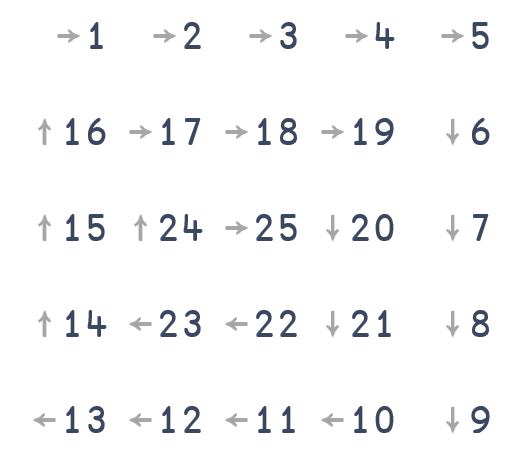

A recursive solution is given below:

In [17]:
⎕←5 5⍴⎕A
{0∊⍴⍵:0⍴⍵ ⋄ (1⌷⍵),∇⊖⍉1↓⍵} 5 5⍴⎕A

ABCDE
FGHIJ
KLMNO
PQRST
UVWXY

ABCDEJOTYXWVUPKFGHINSRQLM

**Task:** Try to write a function which does snail sort without looping or recursion.

<details>
    <summary><strong>HINT</strong></summary>
How can we select the required elements "all at once"? Think about representing "steps" through the matrix. A `+\` is likely useful.
</details> 

---
A non-looping solution is provided in the following summary tag.

<details>
    <summary>Reveal solution</summary>
<pre><code class="language-apl">
SnailSort ← {
    s←⊃⍴⍵
    i←+\(1↓2/⌽⍳s)/(¯1+2×s)⍴(+,-)1,s
    (,⍵)[i]
}
</code></pre>
</details>

---

You might notice that this solution only works for square matrices.

**Task:** Generalise the solution to work with any shape matrix.